# Credit Card Fraud Detection
### Recognize fraudulent credit card transactions
### 3.2 Oversampling
             KwangMyung Yu, Senior Researcher, Korea Electric Power Corporation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30 #중요

In [2]:
color_pal = [ '#ee4035', '#3385c6', '#fed766','#eb6841', '#708090', 
	'#00a0b0', '#3b7dd8', '#fe4a49' , '#2ab7ca', '#851e3e', 
	'#2a4d69',  '#f7f7f7', '#edc951', '#54b2a9', '#ffffff', 
	'#96ceb4', '#ffeead', '#708090', '#be9b7b', '#feb2a8',
	'#58668b',  '#4f372d', '#ECD59F', '#ABD1DC', '#7E9680', 
    	'#E69D45', '#D4CFC9', '#E79796', '#C6C09C', '#dec3c3',
    	'#4b86b4', '#f9caa7', '#d2d4dc', '#ebf4f6', '#29a8ab' ]

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score,precision_score, accuracy_score
from sklearn.metrics import classification_report

In [4]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [6]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", 
                 fontsize = 16)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
data = pd.concat([X_train, y_train], axis = 1  )

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.960647,0.763452,0.842775,0.204318,0.758099,0.269866,0.257882,0.791613,0.375087,0.540551,0.286332,0.673156,0.476382,0.649411,0.373110,0.416167,0.763728,0.743389,0.796556,0.579968,0.562250,0.532742,0.666894,0.408700,0.523004,0.451754,0.419360,0.316008,0.349580,0
1,0.937487,0.778646,0.866046,0.291186,0.767456,0.262875,0.268479,0.785321,0.435766,0.515432,0.381947,0.718193,0.402575,0.664051,0.408625,0.429846,0.733673,0.662858,0.618587,0.578753,0.564805,0.533187,0.659784,0.415053,0.593216,0.393511,0.408617,0.315449,0.310746,0
2,0.960340,0.776268,0.835055,0.215063,0.771986,0.257684,0.271406,0.783793,0.462986,0.500200,0.176346,0.699338,0.474264,0.646769,0.310677,0.455800,0.708045,0.623882,0.587317,0.580266,0.556187,0.474999,0.664470,0.246617,0.558459,0.458498,0.421077,0.314890,0.081599,0
3,0.898383,0.739208,0.865208,0.281832,0.780090,0.270394,0.252593,0.801853,0.479653,0.489915,0.230392,0.703236,0.374951,0.655241,0.443471,0.422449,0.763751,0.551077,0.473866,0.589053,0.566507,0.508448,0.664071,0.159414,0.576510,0.509358,0.421699,0.304357,0.370188,0
4,0.978531,0.773099,0.827424,0.283306,0.768086,0.256350,0.266733,0.785073,0.448242,0.496593,0.410301,0.726836,0.429158,0.610367,0.375641,0.463916,0.762125,0.675296,0.529440,0.579260,0.560264,0.502385,0.664454,0.369370,0.604080,0.487764,0.416172,0.313715,0.055674,0


In [9]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 7)

In [11]:
X_over_sample, y_over_sample = smote.fit_sample(X, y)

In [12]:
X_over_sample = pd.DataFrame(data = X_over_sample, columns=[i for i in data.columns if i not in ['Class']])
y_over_sample = pd.DataFrame(data = y_over_sample, columns=['Class'])
over_sample_data = pd.concat([X_over_sample, y_over_sample], axis = 1)

In [13]:
print('Raw Data shape: ',data.shape)
print('Oversampling Data shape ', over_sample_data.shape)
print('Oversampling Data Label distribution \n', pd.Series(over_sample_data['Class']).value_counts())

Raw Data shape:  (199364, 30)
Oversampling Data shape  (398040, 30)
Oversampling Data Label distribution 
 1    199020
0    199020
Name: Class, dtype: int64


In [14]:
print("Percentage of normal transactions: ", 
      len(over_sample_data[over_sample_data.Class == 0])/len(over_sample_data))
print("Percentage of fraud transactions: ", 
      len(over_sample_data[over_sample_data.Class == 1])/len(over_sample_data))
print("Total number of transactions in resampled data: "
      , len(over_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  398040


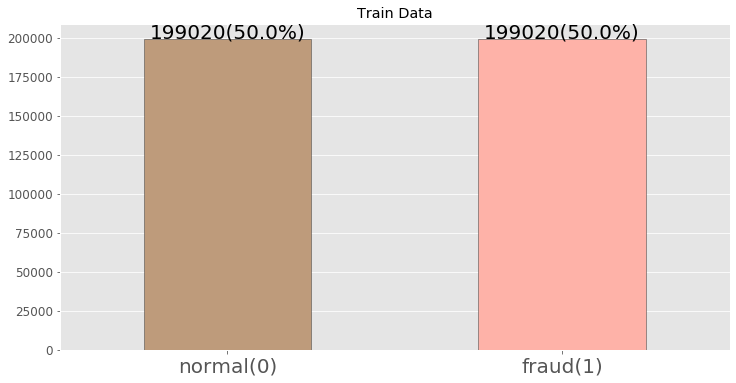

In [15]:
fig, ax = plt.subplots(figsize = (12, 6))
over_sample_data['Class'].value_counts().plot(kind = 'bar', color = color_pal[18:], 
                        edgecolor='#404040', ax = ax, fontsize = 12, rot = 0)

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height()+1000, 
            str(p.get_height())+'('+str(round((p.get_height()/over_sample_data.shape[0])*100,
            2))+ '%)', ha='center', fontsize = 20)

ax.set_title('Train Data')
ax.set_xticklabels(['normal(0)', 'fraud(1)'], fontsize = 20)
plt.show()

In [16]:
X_train = over_sample_data.drop('Class', axis = 1)
y_train = over_sample_data['Class']

#### Xgboost

In [17]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Test Result(Base_XGB)
accuracy :  0.9993562960102056
precsion : 0.7924528301886793
recall :  0.8513513513513513


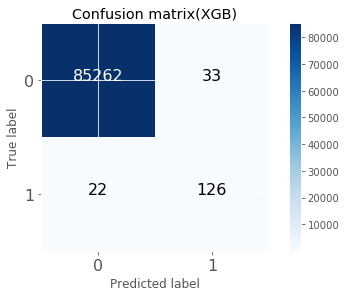

In [18]:
y_pred = XGB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_XGB)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(XGB)')
plt.show()

#### LGBM

In [19]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Test Result(Base_LGBM)
accuracy :  0.9986189623491685
precsion : 0.5681818181818182
recall :  0.8445945945945946


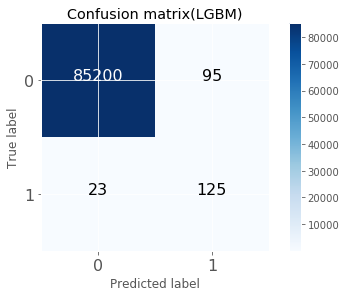

In [20]:
y_pred = LGBM.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_LGBM)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(LGBM)')
plt.show()

#### CatBoost

In [21]:
Cat = CatBoostClassifier()
Cat.fit(X_train, y_train)

Learning rate set to 0.132771
0:	learn: 0.4289140	total: 132ms	remaining: 2m 12s
1:	learn: 0.3040462	total: 168ms	remaining: 1m 24s
2:	learn: 0.2308291	total: 210ms	remaining: 1m 9s
3:	learn: 0.1924470	total: 253ms	remaining: 1m 2s
4:	learn: 0.1584232	total: 301ms	remaining: 59.9s
5:	learn: 0.1400833	total: 342ms	remaining: 56.6s
6:	learn: 0.1266402	total: 389ms	remaining: 55.2s
7:	learn: 0.1158632	total: 425ms	remaining: 52.7s
8:	learn: 0.1058123	total: 466ms	remaining: 51.3s
9:	learn: 0.0991785	total: 511ms	remaining: 50.6s
10:	learn: 0.0937413	total: 549ms	remaining: 49.4s
11:	learn: 0.0881981	total: 584ms	remaining: 48.1s
12:	learn: 0.0844168	total: 623ms	remaining: 47.3s
13:	learn: 0.0808725	total: 657ms	remaining: 46.3s
14:	learn: 0.0773675	total: 696ms	remaining: 45.7s
15:	learn: 0.0748957	total: 730ms	remaining: 44.9s
16:	learn: 0.0711416	total: 767ms	remaining: 44.3s
17:	learn: 0.0670396	total: 811ms	remaining: 44.3s
18:	learn: 0.0631578	total: 846ms	remaining: 43.7s
19:	learn

164:	learn: 0.0046694	total: 6.34s	remaining: 32.1s
165:	learn: 0.0045657	total: 6.38s	remaining: 32.1s
166:	learn: 0.0045414	total: 6.42s	remaining: 32s
167:	learn: 0.0045025	total: 6.45s	remaining: 31.9s
168:	learn: 0.0044456	total: 6.49s	remaining: 31.9s
169:	learn: 0.0043940	total: 6.53s	remaining: 31.9s
170:	learn: 0.0043643	total: 6.56s	remaining: 31.8s
171:	learn: 0.0043271	total: 6.59s	remaining: 31.7s
172:	learn: 0.0042891	total: 6.63s	remaining: 31.7s
173:	learn: 0.0042662	total: 6.66s	remaining: 31.6s
174:	learn: 0.0042338	total: 6.7s	remaining: 31.6s
175:	learn: 0.0041700	total: 6.74s	remaining: 31.6s
176:	learn: 0.0041416	total: 6.77s	remaining: 31.5s
177:	learn: 0.0040814	total: 6.81s	remaining: 31.4s
178:	learn: 0.0040118	total: 6.84s	remaining: 31.4s
179:	learn: 0.0039843	total: 6.88s	remaining: 31.3s
180:	learn: 0.0039505	total: 6.91s	remaining: 31.3s
181:	learn: 0.0039162	total: 6.95s	remaining: 31.3s
182:	learn: 0.0038601	total: 6.99s	remaining: 31.2s
183:	learn: 0.0

325:	learn: 0.0027528	total: 11.5s	remaining: 23.8s
326:	learn: 0.0027528	total: 11.5s	remaining: 23.8s
327:	learn: 0.0027528	total: 11.6s	remaining: 23.7s
328:	learn: 0.0027528	total: 11.6s	remaining: 23.7s
329:	learn: 0.0027528	total: 11.6s	remaining: 23.6s
330:	learn: 0.0027524	total: 11.7s	remaining: 23.6s
331:	learn: 0.0027524	total: 11.7s	remaining: 23.5s
332:	learn: 0.0027524	total: 11.7s	remaining: 23.5s
333:	learn: 0.0027524	total: 11.8s	remaining: 23.4s
334:	learn: 0.0027524	total: 11.8s	remaining: 23.4s
335:	learn: 0.0027521	total: 11.8s	remaining: 23.4s
336:	learn: 0.0027521	total: 11.8s	remaining: 23.3s
337:	learn: 0.0027519	total: 11.9s	remaining: 23.3s
338:	learn: 0.0027518	total: 11.9s	remaining: 23.2s
339:	learn: 0.0027518	total: 11.9s	remaining: 23.2s
340:	learn: 0.0027518	total: 12s	remaining: 23.1s
341:	learn: 0.0027518	total: 12s	remaining: 23.1s
342:	learn: 0.0027517	total: 12s	remaining: 23s
343:	learn: 0.0027517	total: 12.1s	remaining: 23s
344:	learn: 0.0027517	

484:	learn: 0.0024403	total: 16.4s	remaining: 17.4s
485:	learn: 0.0024402	total: 16.4s	remaining: 17.4s
486:	learn: 0.0024401	total: 16.4s	remaining: 17.3s
487:	learn: 0.0024400	total: 16.5s	remaining: 17.3s
488:	learn: 0.0024400	total: 16.5s	remaining: 17.2s
489:	learn: 0.0024399	total: 16.5s	remaining: 17.2s
490:	learn: 0.0024399	total: 16.6s	remaining: 17.2s
491:	learn: 0.0024398	total: 16.6s	remaining: 17.1s
492:	learn: 0.0024398	total: 16.6s	remaining: 17.1s
493:	learn: 0.0024397	total: 16.7s	remaining: 17.1s
494:	learn: 0.0024366	total: 16.7s	remaining: 17s
495:	learn: 0.0024006	total: 16.7s	remaining: 17s
496:	learn: 0.0023962	total: 16.8s	remaining: 17s
497:	learn: 0.0023934	total: 16.8s	remaining: 16.9s
498:	learn: 0.0023913	total: 16.8s	remaining: 16.9s
499:	learn: 0.0023896	total: 16.9s	remaining: 16.9s
500:	learn: 0.0023873	total: 16.9s	remaining: 16.8s
501:	learn: 0.0023862	total: 16.9s	remaining: 16.8s
502:	learn: 0.0023853	total: 16.9s	remaining: 16.7s
503:	learn: 0.0023

643:	learn: 0.0023668	total: 21.6s	remaining: 11.9s
644:	learn: 0.0023668	total: 21.6s	remaining: 11.9s
645:	learn: 0.0023667	total: 21.6s	remaining: 11.9s
646:	learn: 0.0023667	total: 21.7s	remaining: 11.8s
647:	learn: 0.0023667	total: 21.7s	remaining: 11.8s
648:	learn: 0.0023667	total: 21.7s	remaining: 11.7s
649:	learn: 0.0023667	total: 21.7s	remaining: 11.7s
650:	learn: 0.0023667	total: 21.8s	remaining: 11.7s
651:	learn: 0.0023667	total: 21.8s	remaining: 11.6s
652:	learn: 0.0023667	total: 21.8s	remaining: 11.6s
653:	learn: 0.0023667	total: 21.9s	remaining: 11.6s
654:	learn: 0.0023667	total: 21.9s	remaining: 11.5s
655:	learn: 0.0023667	total: 21.9s	remaining: 11.5s
656:	learn: 0.0023667	total: 21.9s	remaining: 11.5s
657:	learn: 0.0023667	total: 22s	remaining: 11.4s
658:	learn: 0.0023667	total: 22s	remaining: 11.4s
659:	learn: 0.0023667	total: 22s	remaining: 11.4s
660:	learn: 0.0023667	total: 22.1s	remaining: 11.3s
661:	learn: 0.0023667	total: 22.1s	remaining: 11.3s
662:	learn: 0.0023

807:	learn: 0.0023610	total: 26.4s	remaining: 6.26s
808:	learn: 0.0023610	total: 26.4s	remaining: 6.23s
809:	learn: 0.0023607	total: 26.4s	remaining: 6.19s
810:	learn: 0.0023607	total: 26.4s	remaining: 6.16s
811:	learn: 0.0023607	total: 26.5s	remaining: 6.13s
812:	learn: 0.0023607	total: 26.5s	remaining: 6.09s
813:	learn: 0.0023607	total: 26.5s	remaining: 6.06s
814:	learn: 0.0023607	total: 26.6s	remaining: 6.03s
815:	learn: 0.0023607	total: 26.6s	remaining: 5.99s
816:	learn: 0.0023607	total: 26.6s	remaining: 5.96s
817:	learn: 0.0023607	total: 26.6s	remaining: 5.92s
818:	learn: 0.0023607	total: 26.7s	remaining: 5.89s
819:	learn: 0.0023607	total: 26.7s	remaining: 5.86s
820:	learn: 0.0023607	total: 26.7s	remaining: 5.82s
821:	learn: 0.0023607	total: 26.8s	remaining: 5.79s
822:	learn: 0.0023607	total: 26.8s	remaining: 5.76s
823:	learn: 0.0023607	total: 26.8s	remaining: 5.72s
824:	learn: 0.0023607	total: 26.8s	remaining: 5.69s
825:	learn: 0.0023604	total: 26.9s	remaining: 5.66s
826:	learn: 

971:	learn: 0.0023598	total: 31.1s	remaining: 896ms
972:	learn: 0.0023598	total: 31.1s	remaining: 863ms
973:	learn: 0.0023598	total: 31.1s	remaining: 831ms
974:	learn: 0.0023598	total: 31.2s	remaining: 799ms
975:	learn: 0.0023598	total: 31.2s	remaining: 767ms
976:	learn: 0.0023597	total: 31.2s	remaining: 735ms
977:	learn: 0.0023597	total: 31.3s	remaining: 703ms
978:	learn: 0.0023597	total: 31.3s	remaining: 671ms
979:	learn: 0.0023597	total: 31.3s	remaining: 639ms
980:	learn: 0.0023597	total: 31.3s	remaining: 607ms
981:	learn: 0.0023597	total: 31.4s	remaining: 575ms
982:	learn: 0.0023597	total: 31.4s	remaining: 543ms
983:	learn: 0.0023597	total: 31.4s	remaining: 511ms
984:	learn: 0.0023597	total: 31.5s	remaining: 479ms
985:	learn: 0.0023597	total: 31.5s	remaining: 447ms
986:	learn: 0.0023597	total: 31.5s	remaining: 415ms
987:	learn: 0.0023597	total: 31.5s	remaining: 383ms
988:	learn: 0.0023597	total: 31.6s	remaining: 351ms
989:	learn: 0.0023597	total: 31.6s	remaining: 319ms
990:	learn: 

Test Result(Base_Cat)
accuracy :  0.9990168884519505
precsion : 0.6739130434782609
recall :  0.8378378378378378


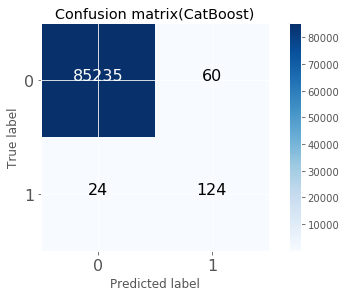

In [22]:
y_pred = Cat.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_Cat)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(CatBoost)')
plt.show()

In [23]:
from sklearn.svm import SVC 

In [24]:
svc = SVC(degree=5)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Test Result(Base_LGBM)
accuracy :  0.9801388059876175
precsion : 0.07233572611816676
recall :  0.8851351351351351


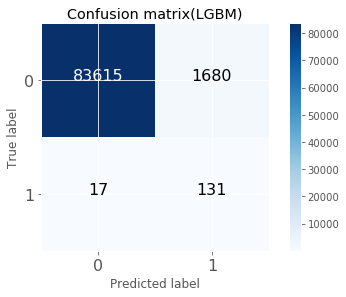

In [25]:
y_pred = svc.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_LGBM)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(LGBM)')
plt.show()